In [39]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
sns.set()

In [29]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations


    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y


        for i in range(self.iterations):
            self.update_weights()
        return self

    
    def update_weights(self):
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))


        tmp = (A - self.Y.T)
        tmp = np.reshape(tmp, self.m)
        dw = np.dot(self.X.T, tmp) / self.m
        db = np.sum(tmp) / self.m


        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

        return self


    def predict(self, X):
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        Y = np.where(Z > 0.5, 1, 0)
        return Y

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nimapourmoradi/raisin-binary-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/raisin-binary-classification


In [5]:
os.listdir('/kaggle/input/raisin-binary-classification')

['Raisin_Dataset.xlsx', 'Raisin_Dataset.csv']

In [6]:
df = pd.read_csv('/kaggle/input/raisin-binary-classification/Raisin_Dataset.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [7]:
df.shape

(900, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [9]:
df.apply(pd.isnull).sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [12]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [13]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

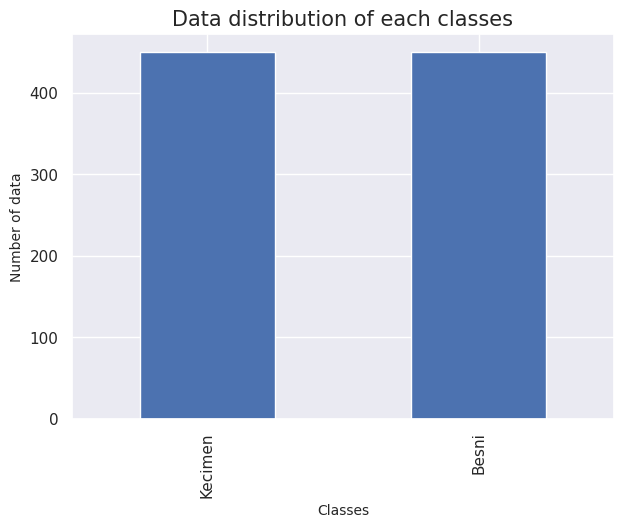

In [14]:
df['Class'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [15]:
le = LabelEncoder()

In [16]:
df['Class'] = le.fit_transform(df['Class'])

In [17]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [18]:
X = df.drop(columns = ['Class'], axis = 1)
y = df['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

In [20]:
print('The training set size is:', len(X_train))
print('The test set size is:', len(X_test))

The training set size is: 720
The test set size is: 180


In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_test_scaled = scaler.transform(X_test)

In [35]:
model = LogisticRegression(learning_rate = 0.01, iterations = 1000)

In [36]:
model.fit(X_train_scaled, y_train)

In [37]:
y_pred = model.predict(X_test_scaled)

In [38]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        90
           1       0.89      0.92      0.91        90

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180



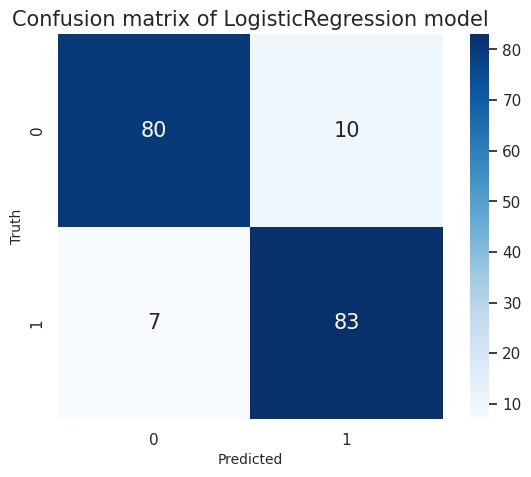

In [41]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix of LogisticRegression model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()